# PCA & Clustering Assignment

In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format



## Importing Data

In [265]:
df=pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553
1,Albania,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090
2,Algeria,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460
3,Angola,119.00,62.30,2.85,42.90,5900,22.40,60.10,6.16,3530
4,Antigua and Barbuda,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200


## Convering columns with percentage into Absolute Values

In [266]:

df['exports']=df['exports']*df['gdpp']/100
df['health']=df['health']*df['gdpp']/100
df['imports']=df['imports']*df['gdpp']/100


In [267]:
df.shape

(167, 10)

In [268]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.20,55.30,41.92,248.30,1610,9.44,56.20,5.82,553
1,Albania,16.60,1145.20,267.89,1987.74,9930,4.49,76.30,1.65,4090
2,Algeria,27.30,1712.64,185.98,1400.44,12900,16.10,76.50,2.89,4460
3,Angola,119.00,2199.19,100.61,1514.37,5900,22.40,60.10,6.16,3530
4,Antigua and Barbuda,10.30,5551.00,735.66,7185.80,19100,1.44,76.80,2.13,12200


In [269]:
#Checking Percentile Data
df.describe(percentiles=[0,.25,.50,.75,.80,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00
mean,38.27,7420.62,1056.73,6588.35,17144.69,7.78,70.56,2.95,12964.16
std,40.33,17973.89,1801.41,14710.81,19278.07,10.57,8.89,1.51,18328.70
min,2.60,1.08,12.82,0.65,609.00,-4.21,32.10,1.15,231.00
0%,2.60,1.08,12.82,0.65,609.00,-4.21,32.10,1.15,231.00
25%,8.25,447.14,78.54,640.21,3355.00,1.81,65.30,1.79,1330.00
50%,19.30,1777.44,321.89,2045.58,9960.00,5.39,73.10,2.41,4660.00
75%,62.10,7278.00,976.94,7719.60,22800.00,10.75,76.80,3.88,14050.00
80%,66.32,10194.96,1274.65,9854.72,29420.00,12.50,78.20,4.59,21020.00
90%,100.22,17760.60,3825.42,15034.28,41220.00,16.64,80.40,5.32,41840.00


In [270]:
#Checking percentage of nulls in Dataframe
round((df.isnull().sum(axis=0)/len(df)*100),2)

country      0.00
child_mort   0.00
exports      0.00
health       0.00
imports      0.00
income       0.00
inflation    0.00
life_expec   0.00
total_fer    0.00
gdpp         0.00
dtype: float64

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


## Visualization

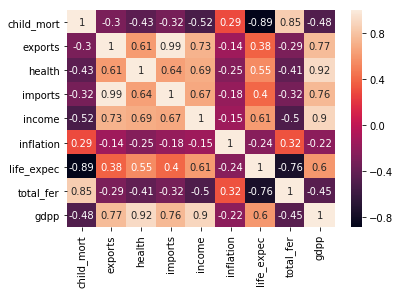

In [272]:
#Heat Map
sns.heatmap(df.corr(),annot = True)

There are 3 very high correlation present in  dataframe..

1.child_mort & life_expec

2.total_fer & child_mort

3.Income & gdpp

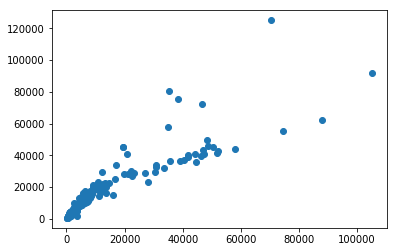

In [273]:
#Scatter Plot bw gdpp & life_expec

plt.scatter(df['gdpp'],df['income'])

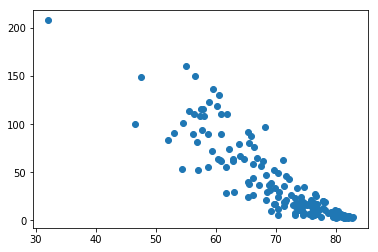

In [274]:
#Scatter Plot bw life_expec & child_mort

plt.scatter(df['life_expec'],df['child_mort'])

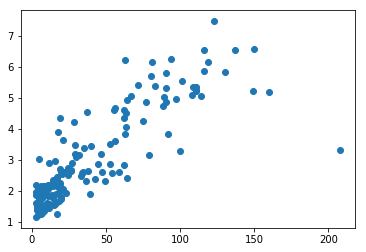

In [275]:
#Scatter Plot bw child_mort & total_fer

plt.scatter(df['child_mort'],df['total_fer'])

In [276]:
# Creating duplicate dataframe 

df_first=df.copy()

df_first.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.20,55.30,41.92,248.30,1610,9.44,56.20,5.82,553
1,Albania,16.60,1145.20,267.89,1987.74,9930,4.49,76.30,1.65,4090
2,Algeria,27.30,1712.64,185.98,1400.44,12900,16.10,76.50,2.89,4460
3,Angola,119.00,2199.19,100.61,1514.37,5900,22.40,60.10,6.16,3530
4,Antigua and Barbuda,10.30,5551.00,735.66,7185.80,19100,1.44,76.80,2.13,12200


In [277]:
#Removing 'country' from dataframe and copying it into 'y'

y=df_first.pop('country')
df_first.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.20,55.30,41.92,248.30,1610,9.44,56.20,5.82,553
1,16.60,1145.20,267.89,1987.74,9930,4.49,76.30,1.65,4090
2,27.30,1712.64,185.98,1400.44,12900,16.10,76.50,2.89,4460
3,119.00,2199.19,100.61,1514.37,5900,22.40,60.10,6.16,3530
4,10.30,5551.00,735.66,7185.80,19100,1.44,76.80,2.13,12200


## Scaling

In [278]:
#from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler

In [279]:
scaler=StandardScaler()

In [280]:
df_scaled=scaler.fit_transform(df_first)

C:\Users\atyag\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\atyag\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [281]:
# Scaled Dataframe

df_scaled

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

## PCA

In [282]:
#from sklearn.decomposition import PCA

from sklearn.decomposition import PCA

In [283]:
# Creating PCA Object

pca=PCA(random_state=42)

In [284]:
pca.fit(df_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

In [285]:
#Finding PCA components

pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [286]:
# Finding Variance Ratio

pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

In [287]:
# Finding Cummlative Variance

var_cum=np.cumsum(pca.explained_variance_ratio_)

In [288]:
var_cum

array([0.58937298, 0.77382467, 0.87293939, 0.93366217, 0.96395389,
       0.98855216, 0.9979496 , 0.99950602, 1.        ])

## Scree Plot

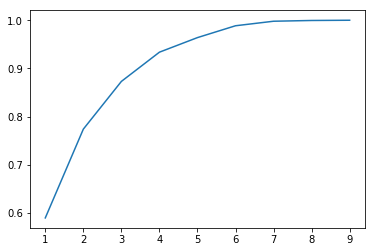

In [289]:
plt.plot(range(1,len(var_cum)+1),var_cum)

-> Its is clear by scree plot that 4 Principal Components are sufficient explaing 94% variance so i decided to take 4 PC's

In [290]:
# from sklearn.decomposition import IncrementalPCA

from sklearn.decomposition import IncrementalPCA

In [291]:
pca_final=IncrementalPCA(n_components=4)

In [292]:
# Transforming data with 4 PC's

newdata=pca_final.fit_transform(df_scaled)

In [293]:
newdata[:5]

array([[-2.63664719,  1.47208541, -0.54649969,  0.23726711],
       [-0.02384536, -1.43581581, -0.00907965, -0.44292125],
       [-0.45926005, -0.67879398,  0.9678517 , -0.17638918],
       [-2.72358099,  2.17601815,  0.59779391,  0.4389188 ],
       [ 0.64877708, -1.02649806, -0.24417031, -0.26751341]])

In [294]:
newdata.shape

(167, 4)

In [295]:
# Transposing Dataframe

pc=np.transpose(newdata)

-> Transposing is important before converting resulting array into dataframe.

In [296]:
pc.shape

(4, 167)

In [297]:
# Creating DataFrame by Transposed 'pc' array

df_PCA=pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3]})
df_PCA.head()

,PC1,PC2,PC3,PC4
0,-2.64,1.47,-0.55,0.24
1,-0.02,-1.44,-0.01,-0.44
2,-0.46,-0.68,0.97,-0.18
3,-2.72,2.18,0.60,0.44
4,0.65,-1.03,-0.24,-0.27


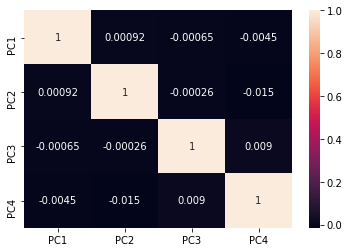

In [298]:
#Heatmap after applying PCA

sns.heatmap(df_PCA.corr(),annot = True)

##  Removing Outliers

In [299]:
# Adding 'country' column again to dataframe for outlier treatment

df_PCA['country']=y
df_PCA.head()

,PC1,PC2,PC3,PC4,country
0,-2.64,1.47,-0.55,0.24,Afghanistan
1,-0.02,-1.44,-0.01,-0.44,Albania
2,-0.46,-0.68,0.97,-0.18,Algeria
3,-2.72,2.18,0.60,0.44,Angola
4,0.65,-1.03,-0.24,-0.27,Antigua and Barbuda


-> If we will not add 'country' column in dataframe before outlier treatment then we will not be able to merge the clusters in orignal dataframe because we are using 'country' as index.

,PC1,PC2,PC3,PC4,country
0,-2.64,1.47,-0.55,0.24,Afghanistan
1,-0.02,-1.44,-0.01,-0.44,Albania
2,-0.46,-0.68,0.97,-0.18,Algeria
3,-2.72,2.18,0.60,0.44,Angola
4,0.65,-1.03,-0.24,-0.27,Antigua and Barbuda


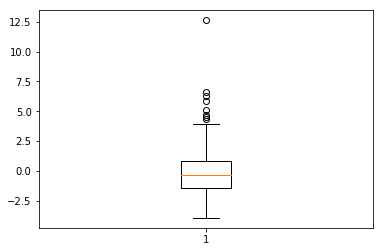

In [300]:
#Boxplot & Outlier removal for 'PC1'

plt.boxplot(df_PCA.PC1)
Q1 = df_PCA.PC1.quantile(0.05)
Q3 = df_PCA.PC1.quantile(0.95)
IQR=Q3-Q1

df_PCA2 = df_PCA[(df_PCA.PC1 >= (Q1-(1.5*IQR))) & (df_PCA.PC1 <= (Q3+(1.5*IQR)))]
df_PCA2.head()

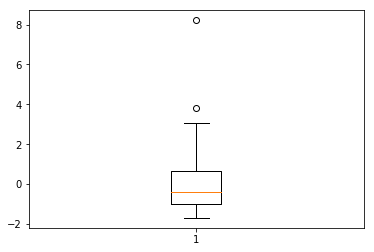

In [301]:
#Boxplot & Outlier removal for 'PC2'

plt.boxplot(df_PCA.PC2)
Q1 = df_PCA.PC2.quantile(0.05)
Q3 = df_PCA.PC2.quantile(0.95)
IQR=Q3-Q1

df_PCA2 = df_PCA[(df_PCA.PC2 >= (Q1-(1.5*IQR))) & (df_PCA.PC2 <= (Q3+(1.5*IQR)))]
#df_PCA2=df_PCA.copy()

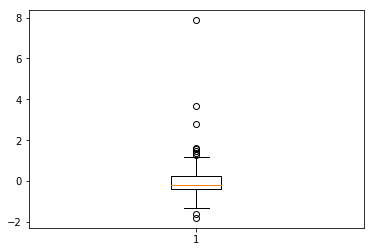

In [302]:
#Boxplot & Outlier removal for 'PC3'

plt.boxplot(df_PCA.PC3)
Q1 = df_PCA.PC3.quantile(0.05)
Q3 = df_PCA.PC3.quantile(0.95)
IQR=Q3-Q1

df_PCA2 = df_PCA[(df_PCA.PC3 >= (Q1-(1.5*IQR))) & (df_PCA.PC3 <= (Q3+(1.5*IQR)))]
#df_PCA2=df_PCA.copy()

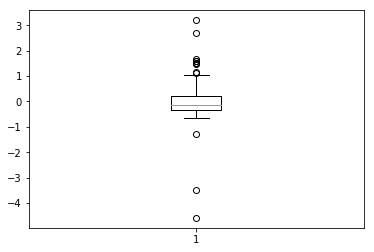

In [303]:
#Boxplot & Outlier removal for 'PC4'

plt.boxplot(df_PCA.PC4)
Q1 = df_PCA.PC4.quantile(0.05)
Q3 = df_PCA.PC4.quantile(0.95)
IQR=Q3-Q1

df_PCA2 = df_PCA[(df_PCA.PC4 >= (Q1-(1.5*IQR))) & (df_PCA.PC4 <= (Q3+(1.5*IQR)))]
#df_PCA2=df_PCA.copy()

In [304]:
#Copying 'country' column again in 'count' variable

count=df_PCA2['country']

-> I'm doing this so that 'country' column can be added again in dataframe after finding the clusters. 

In [305]:
#Now dropping 'country' from dataframe

df_PCA2.drop('country',axis=1,inplace=True)
df_PCA2.head()

C:\Users\atyag\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,PC1,PC2,PC3,PC4
0,-2.64,1.47,-0.55,0.24
1,-0.02,-1.44,-0.01,-0.44
2,-0.46,-0.68,0.97,-0.18
3,-2.72,2.18,0.60,0.44
4,0.65,-1.03,-0.24,-0.27


## Clustering

### K-means Clustering

In [306]:
# Importing Libraries

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Elbow Curve

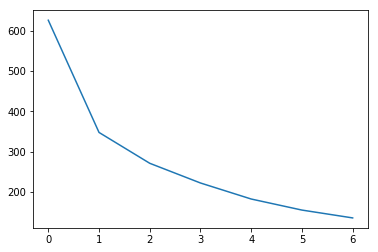

In [307]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_PCA2)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

### Silhouette score

In [308]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state=2)
    kmeans.fit(df_PCA2)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_PCA2, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4706281882533331
For n_clusters=3, the silhouette score is 0.4813242189372244
For n_clusters=4, the silhouette score is 0.4866775514286448
For n_clusters=5, the silhouette score is 0.4495389104881499
For n_clusters=6, the silhouette score is 0.37224358852205025
For n_clusters=7, the silhouette score is 0.3862670561952033
For n_clusters=8, the silhouette score is 0.3726949334212339


### -> By analysing Elbow curve and Silhoutte Score I have decided to take 3 clusters for clustering

### Hopkins Score

In [309]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [310]:
#Calculating Hopkins Score

hopkins(df_PCA2)

0.8882031256141459

-> Hopkins score tells us how suitable our dataframe is for clustering

In [311]:
# Creating k-means Instance and using 3 as number of clusters

kmeans = KMeans(n_clusters=3, max_iter=50,random_state=50)
kmeans.fit(df_PCA2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [312]:
# K-means labels

kmeans.labels_


array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1,
       1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 1, 2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [313]:
# Creting new Dataframe with adding 'country', k-means_id and 'other principal components' colunms

df_PCA3=pd.DataFrame({'country':count,'PC1':df_PCA2.PC1,'PC2':df_PCA2.PC2, 'PC3':df_PCA2.PC3, 'PC4':df_PCA2.PC4, 'kmeans_id':kmeans.labels_})
df_PCA3.head()

,country,PC1,PC2,PC3,PC4,kmeans_id
0,Afghanistan,-2.64,1.47,-0.55,0.24,2
1,Albania,-0.02,-1.44,-0.01,-0.44,0
2,Algeria,-0.46,-0.68,0.97,-0.18,0
3,Angola,-2.72,2.18,0.60,0.44,2
4,Antigua and Barbuda,0.65,-1.03,-0.24,-0.27,0


In [314]:
# Checking No. of Values in each clusters

df_PCA3['kmeans_id'].value_counts()

0    88
2    48
1    29
Name: kmeans_id, dtype: int64

### Creating Plots with k-means clusters

C:\Users\atyag\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\atyag\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\atyag\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


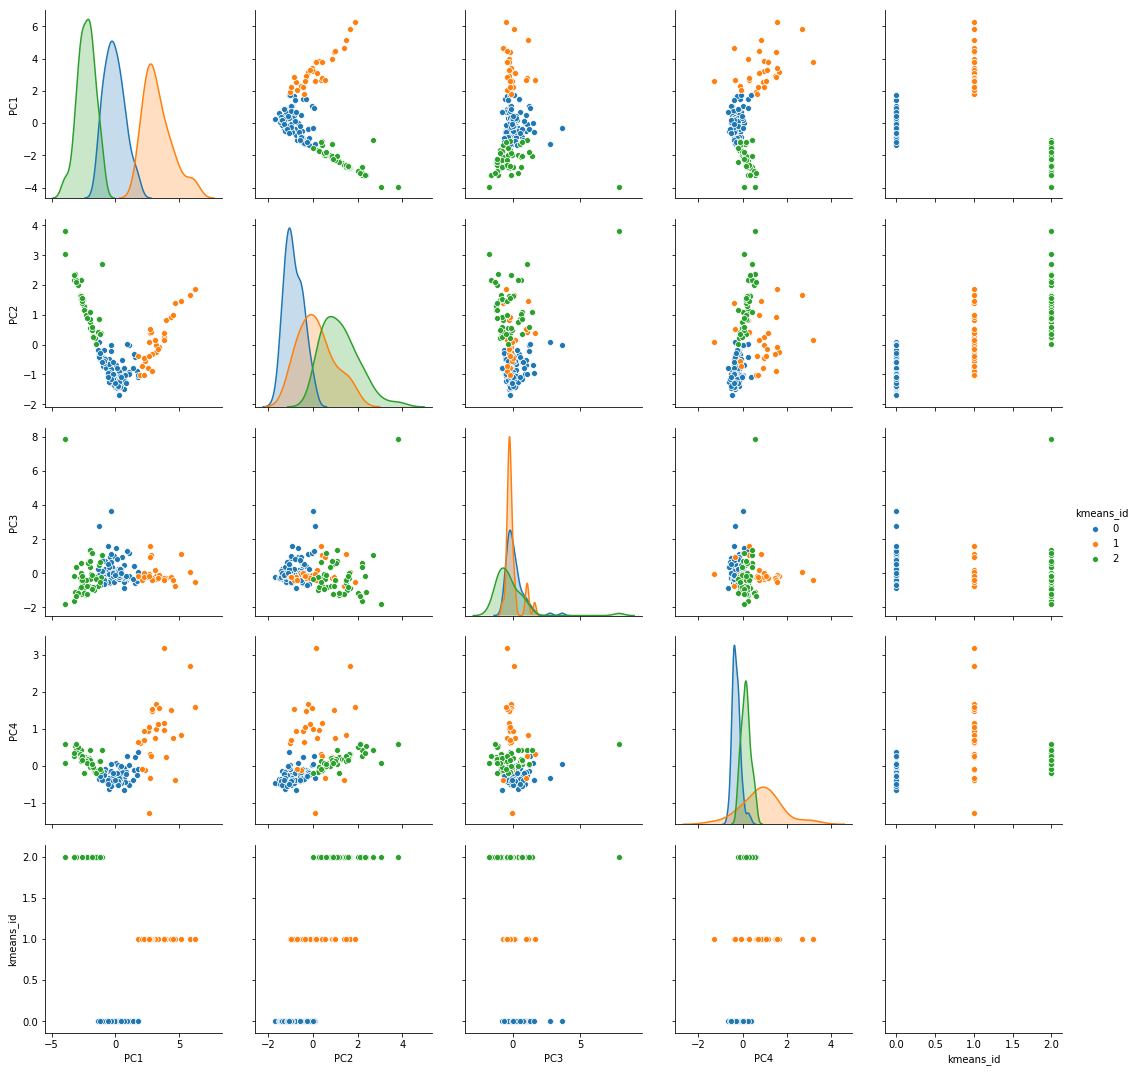

In [315]:
# Pairplot

sns.pairplot(df_PCA3,hue='kmeans_id',size=3)

In [316]:
# Inner Merging: copy of main df and df_PCA3 

dat_1=pd.merge(df.copy(),df_PCA3, how = 'inner', on= 'country')
dat_1.drop(['PC1','PC2','PC3','PC4'],axis=1,inplace=True)
dat_1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_id
0,Afghanistan,90.20,55.30,41.92,248.30,1610,9.44,56.20,5.82,553,2
1,Albania,16.60,1145.20,267.89,1987.74,9930,4.49,76.30,1.65,4090,0
2,Algeria,27.30,1712.64,185.98,1400.44,12900,16.10,76.50,2.89,4460,0
3,Angola,119.00,2199.19,100.61,1514.37,5900,22.40,60.10,6.16,3530,2
4,Antigua and Barbuda,10.30,5551.00,735.66,7185.80,19100,1.44,76.80,2.13,12200,0


#### Boxplots

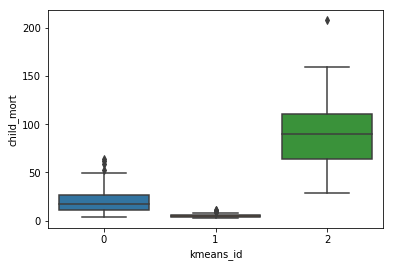

In [317]:
sns.boxplot(x='kmeans_id', y='child_mort', data=dat_1)

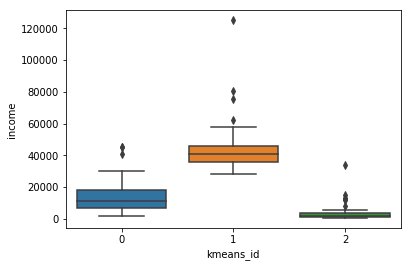

In [318]:
sns.boxplot(x='kmeans_id', y='income', data=dat_1)

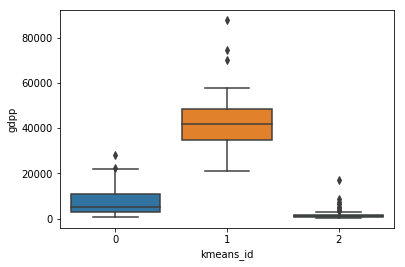

In [319]:
sns.boxplot(x='kmeans_id', y='gdpp', data=dat_1)

### Scatter plot for kmeans

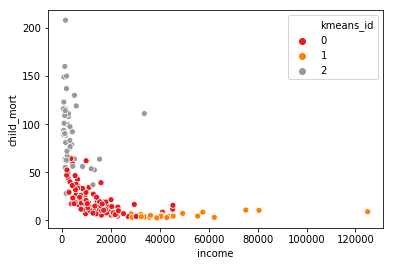

In [320]:
sns.scatterplot(x="income", y="child_mort", hue="kmeans_id",palette="Set1",data=dat_1)

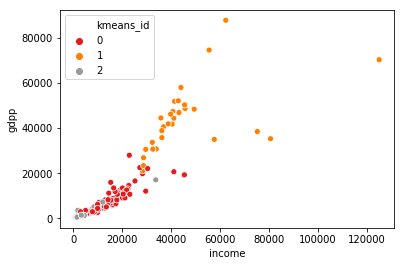

In [321]:
sns.scatterplot(x="income", y="gdpp", hue="kmeans_id",palette="Set1",data=dat_1)

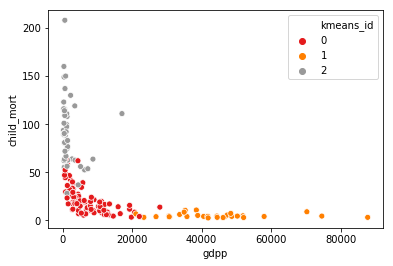

In [322]:
sns.scatterplot(x="gdpp", y="child_mort", hue="kmeans_id",palette="Set1",data=dat_1)

#### Analysing Clusters

In [323]:
# Creating seperate tables for means of child_mort, income & gdpp

clu_mort = pd.DataFrame(dat_1.groupby(["kmeans_id"]).child_mort.mean())
clu_in= pd.DataFrame(dat_1.groupby(["kmeans_id"]).income.mean())
clu_gdpp = pd.DataFrame(dat_1.groupby(["kmeans_id"]).gdpp.mean())




In [324]:
# Concat the tables
dfx = pd.concat([pd.Series([0,1,2]),clu_mort,clu_in,clu_gdpp], axis=1)


In [325]:
# Adding column name 

dfx.columns=[["kmeans_id","child_mort","income","gdpp"]]


In [326]:
dfx

,kmeans_id,child_mort,income,gdpp
0,0,20.92,13455.57,7332.64
1,1,5.08,45800.00,44017.24
2,2,91.61,3897.35,1909.21


#### After observing Boxplot and dfx table, it is clear that 'cluster 2'  contains the values that we need for solving the proble statement. So i filter the main dataframe on basis of mean values of cluster 2 values of 'child_mort', 'income' & 'gdpp'



In [327]:
# Filtering based on 'child_mort','income' & 'gdpp'

df_kmeans1=df.loc[df['child_mort']>=91]


In [328]:
df_kmeans2=df_kmeans1.loc[df_kmeans1['income']<=3897]

In [329]:
df_kmeans_fin=df_kmeans2.loc[df_kmeans2['gdpp']<=1909]


In [330]:
df_kmeans_fin=df_kmeans_fin.reset_index()

In [331]:
df_kmeans_fin.drop('index',axis=1,inplace=True)

Final list that contains desired countries is given below. I could shorten it more by using quantiles values inplace of means but i think all these countries are important because All these need urgent help. So i'm reporting as many as possible countries that i could took.



In [332]:
# Final list of countries by using k-means clustering

df_kmeans_fin

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Benin,111.00,180.40,31.08,281.98,1820,0.89,61.80,5.36,758
1,Burkina Faso,116.00,110.40,38.76,170.20,1430,6.81,57.90,5.87,575
2,Burundi,93.60,20.61,26.80,90.55,764,12.30,57.70,6.26,231
3,Cameroon,108.00,290.82,67.20,353.70,2660,1.91,57.30,5.11,1310
4,Central African Republic,149.00,52.63,17.75,118.19,888,2.01,47.50,5.21,446
5,Chad,150.00,330.10,40.63,390.19,1930,6.39,56.50,6.59,897
6,"Congo, Dem. Rep.",116.00,137.27,26.42,165.66,609,20.80,57.50,6.54,334
7,Cote d'Ivoire,111.00,617.32,64.66,528.26,2690,5.39,56.30,5.27,1220
8,Guinea,109.00,196.34,31.95,279.94,1190,16.10,58.00,5.34,648
9,Guinea-Bissau,114.00,81.50,46.49,192.54,1390,2.97,55.60,5.05,547


# hierarchical Clustering

In [333]:
#Importing Libraries

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### Single Linkage

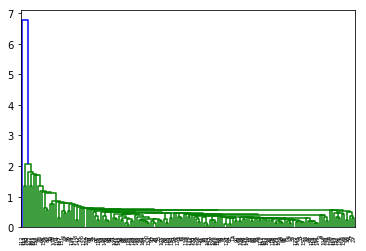

In [334]:
# single linkage

mergings2 = linkage(df_PCA2, method="single", metric='euclidean')
dendrogram(mergings2)
plt.show()

In [335]:
#Choosing numer of clusters

cluster_labels_single = cut_tree(mergings2, n_clusters=4).reshape(-1, )
cluster_labels_single

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [336]:
#Creating new dataframe df_PCA5

df_PCA5=pd.DataFrame({'country':count,'PC1':df_PCA2.PC1,'PC2':df_PCA2.PC2, 'PC3':df_PCA2.PC3, 'PC4':df_PCA2.PC4, 'Herarical_single':cluster_labels_single})
df_PCA5.head()

,country,PC1,PC2,PC3,PC4,Herarical_single
0,Afghanistan,-2.64,1.47,-0.55,0.24,0
1,Albania,-0.02,-1.44,-0.01,-0.44,0
2,Algeria,-0.46,-0.68,0.97,-0.18,0
3,Angola,-2.72,2.18,0.60,0.44,0
4,Antigua and Barbuda,0.65,-1.03,-0.24,-0.27,0


In [337]:
# Counting Values

df_PCA5['Herarical_single'].value_counts()

0    161
3      2
2      1
1      1
Name: Herarical_single, dtype: int64

#### Pair Plot

C:\Users\atyag\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\atyag\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\atyag\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


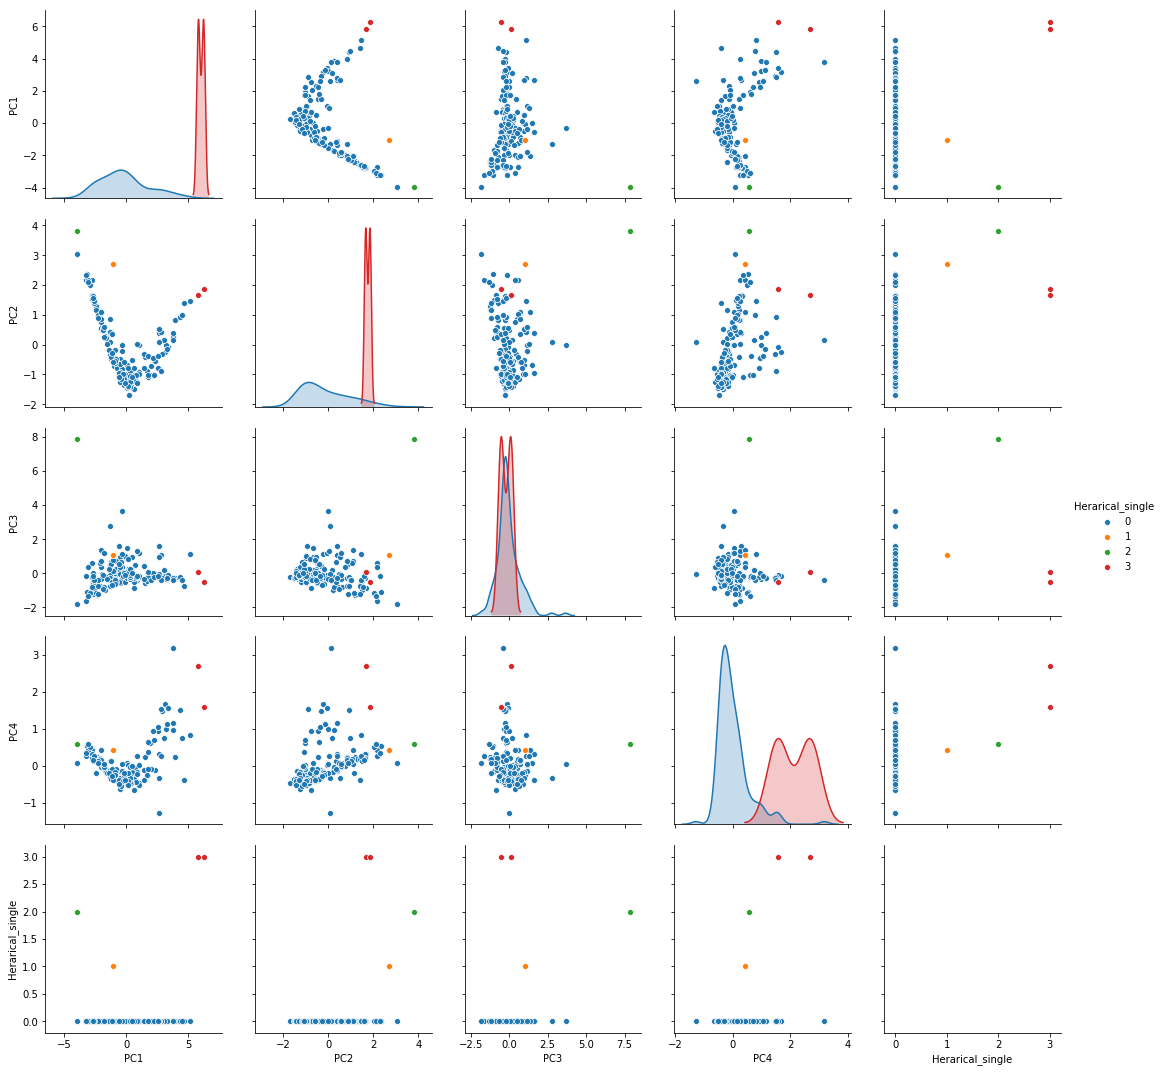

In [338]:
sns.pairplot(df_PCA5,hue='Herarical_single',size=3)

In [339]:
# Merging df_PCA5 with main dataframe

dat_3=pd.merge(df.copy(),df_PCA5, how = 'inner', on= 'country')
dat_3.drop(['PC1','PC2','PC3','PC4'],axis=1,inplace=True)
dat_3.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Herarical_single
0,Afghanistan,90.20,55.30,41.92,248.30,1610,9.44,56.20,5.82,553,0
1,Albania,16.60,1145.20,267.89,1987.74,9930,4.49,76.30,1.65,4090,0
2,Algeria,27.30,1712.64,185.98,1400.44,12900,16.10,76.50,2.89,4460,0
3,Angola,119.00,2199.19,100.61,1514.37,5900,22.40,60.10,6.16,3530,0
4,Antigua and Barbuda,10.30,5551.00,735.66,7185.80,19100,1.44,76.80,2.13,12200,0


#### Boxplots

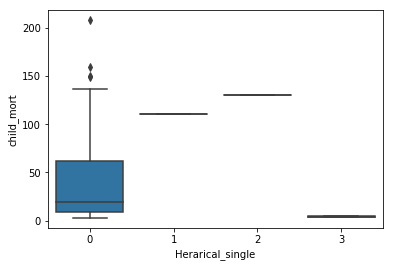

In [340]:
sns.boxplot(x='Herarical_single', y='child_mort', data=dat_3)

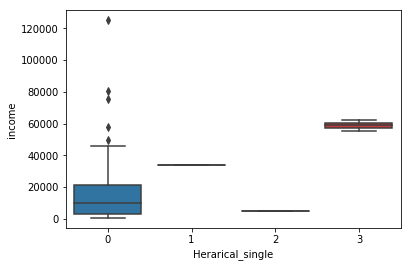

In [341]:
sns.boxplot(x='Herarical_single', y='income', data=dat_3)

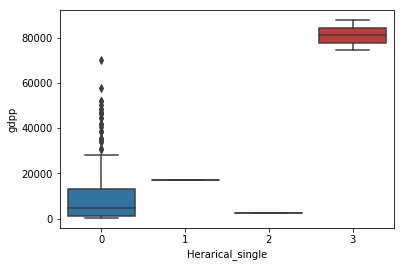

In [342]:
sns.boxplot(x='Herarical_single', y='gdpp', data=dat_3)

### Scatter plot for single linkage

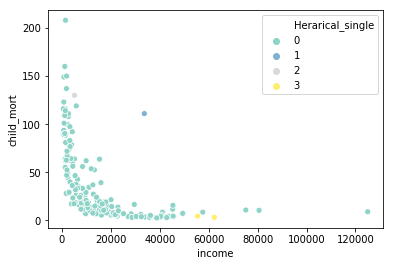

In [343]:
sns.scatterplot(x="income", y="child_mort", hue="Herarical_single",palette="Set3",data=dat_3)

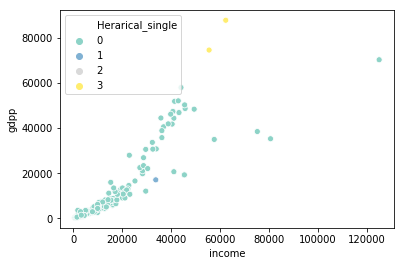

In [344]:
sns.scatterplot(x="income", y="gdpp", hue="Herarical_single",palette="Set3",data=dat_3)

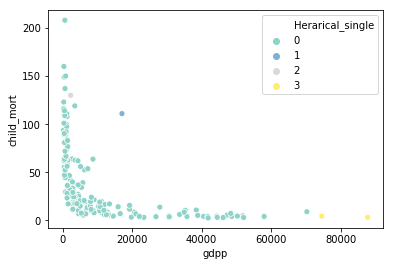

In [345]:
sns.scatterplot(x="gdpp", y="child_mort", hue="Herarical_single",palette="Set3",data=dat_3)

In [346]:
# Creating seperate tables for means of child_mort, income & gdpp
clu_mort = pd.DataFrame(dat_3.groupby(["Herarical_single"]).child_mort.mean())
clu_in= pd.DataFrame(dat_3.groupby(["Herarical_single"]).income.mean())
clu_gdpp = pd.DataFrame(dat_3.groupby(["Herarical_single"]).gdpp.mean())




In [347]:
# Concat the tables

dfx = pd.concat([pd.Series([0,1,2,3]),clu_mort,clu_in,clu_gdpp], axis=1)
dfx

,0,child_mort,income,gdpp
0,0,38.12,15793.25,11376.30
1,1,111.00,33700.00,17100.00
2,2,130.00,5150.00,2330.00
3,3,3.85,58900.00,81200.00


In [348]:
# Adding column names

dfx.columns=[["Herarical_single","child_mort","income","gdpp"]]


In [349]:
dfx

,Herarical_single,child_mort,income,gdpp
0,0,38.12,15793.25,11376.30
1,1,111.00,33700.00,17100.00
2,2,130.00,5150.00,2330.00
3,3,3.85,58900.00,81200.00


In [350]:
df.shape

(167, 10)

In [351]:
# Filtering based on 'child_mort','income' & 'gdpp'

df_her_sin=df.loc[df['child_mort']>=38]


In [352]:
df_her_sin2=df_her_sin.loc[df_her_sin['income']<=15793]

In [353]:
df_her_sin_fin=df_her_sin2.loc[df_her_sin2['gdpp']<=11376]


In [354]:
df_her_sin_fin=df_her_sin_fin.reset_index()

In [355]:
df_her_sin_fin.drop('index',axis=1,inplace=True)

In [356]:
df_her_sin_fin

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.20,55.30,41.92,248.30,1610,9.44,56.20,5.82,553
1,Angola,119.00,2199.19,100.61,1514.37,5900,22.40,60.10,6.16,3530
2,Bangladesh,49.40,121.28,26.68,165.24,2440,7.14,70.40,2.33,758
3,Benin,111.00,180.40,31.08,281.98,1820,0.89,61.80,5.36,758
4,Bhutan,42.70,926.50,113.36,1541.26,6420,5.99,72.10,2.38,2180
5,Bolivia,46.60,815.76,95.83,679.14,5410,8.78,71.60,3.20,1980
6,Botswana,52.50,2768.60,527.05,3257.55,13300,8.92,57.10,2.88,6350
7,Burkina Faso,116.00,110.40,38.76,170.20,1430,6.81,57.90,5.87,575
8,Burundi,93.60,20.61,26.80,90.55,764,12.30,57.70,6.26,231
9,Cambodia,44.40,425.23,44.64,467.67,2520,3.12,66.10,2.88,786


### Complete Linkage

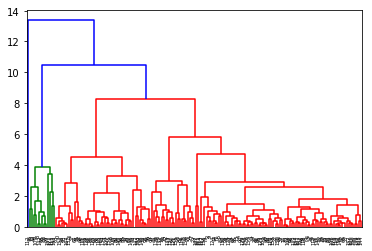

In [357]:
# complete linkage
mergings = linkage(df_PCA2, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [358]:
##Choosing numer of clusters

cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2,
       1, 0, 3, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0])

In [359]:
#Creating new dataframe df_PCA4

df_PCA4=pd.DataFrame({'country':count,'PC1':df_PCA2.PC1,'PC2':df_PCA2.PC2, 'PC3':df_PCA2.PC3, 'PC4':df_PCA2.PC4, 'Herarical_id':cluster_labels})
df_PCA4.head()

,country,PC1,PC2,PC3,PC4,Herarical_id
0,Afghanistan,-2.64,1.47,-0.55,0.24,0
1,Albania,-0.02,-1.44,-0.01,-0.44,1
2,Algeria,-0.46,-0.68,0.97,-0.18,1
3,Angola,-2.72,2.18,0.60,0.44,0
4,Antigua and Barbuda,0.65,-1.03,-0.24,-0.27,1


In [360]:
# Counting Values

df_PCA4['Herarical_id'].value_counts()

1    104
0     47
2     13
3      1
Name: Herarical_id, dtype: int64

### Pairplots

C:\Users\atyag\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


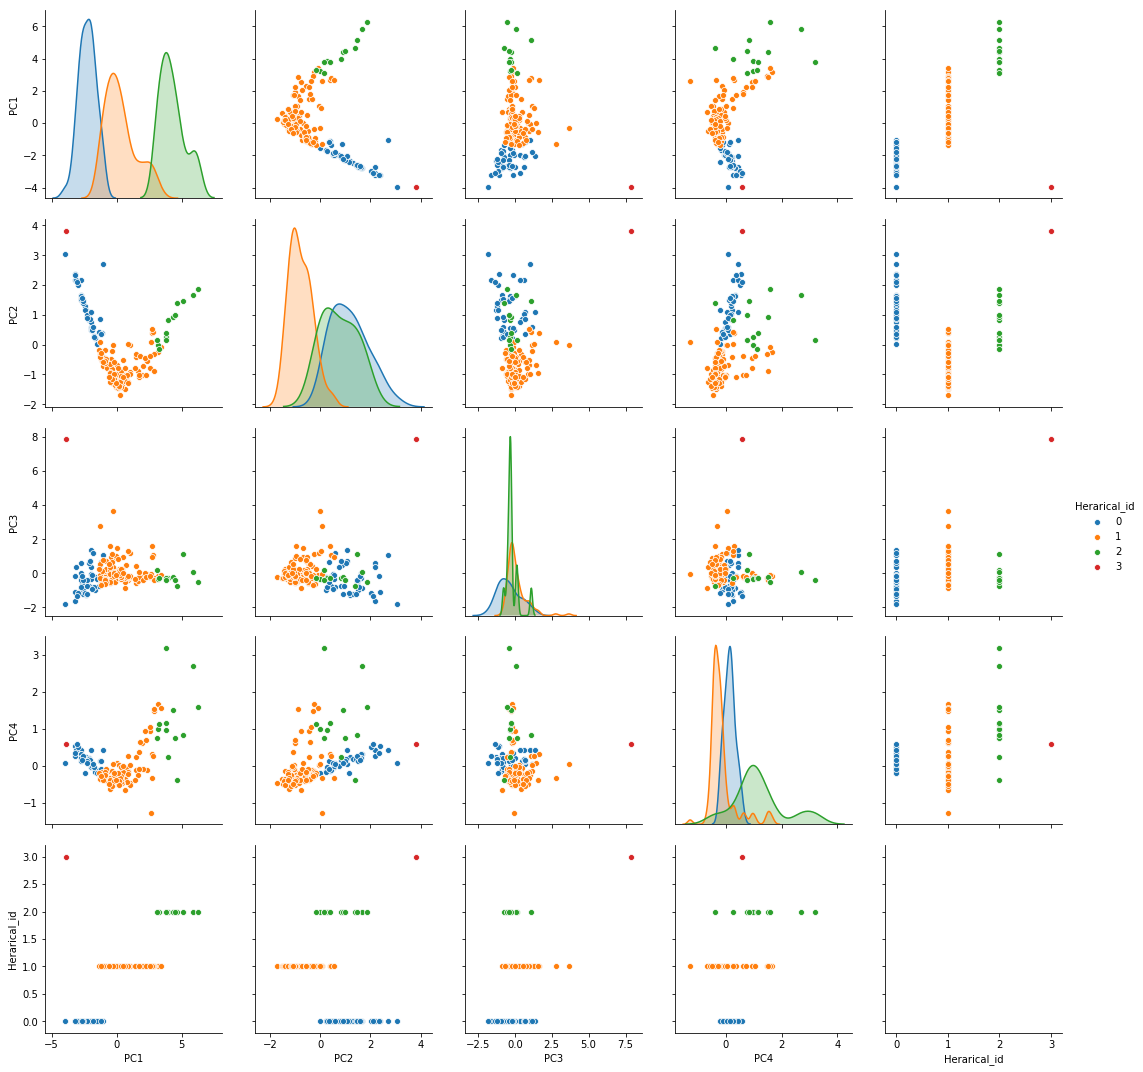

In [361]:
sns.pairplot(df_PCA4,hue='Herarical_id',size=3)

In [362]:
#Merging dataframe with copy of orignal dataframe

dat_2=pd.merge(df.copy(),df_PCA4, how = 'inner', on= 'country')
dat_2.drop(['PC1','PC2','PC3','PC4'],axis=1,inplace=True)
dat_2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Herarical_id
0,Afghanistan,90.20,55.30,41.92,248.30,1610,9.44,56.20,5.82,553,0
1,Albania,16.60,1145.20,267.89,1987.74,9930,4.49,76.30,1.65,4090,1
2,Algeria,27.30,1712.64,185.98,1400.44,12900,16.10,76.50,2.89,4460,1
3,Angola,119.00,2199.19,100.61,1514.37,5900,22.40,60.10,6.16,3530,0
4,Antigua and Barbuda,10.30,5551.00,735.66,7185.80,19100,1.44,76.80,2.13,12200,1


#### Boxplots

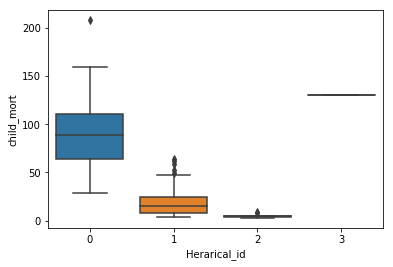

In [363]:
sns.boxplot(x='Herarical_id', y='child_mort', data=dat_2)

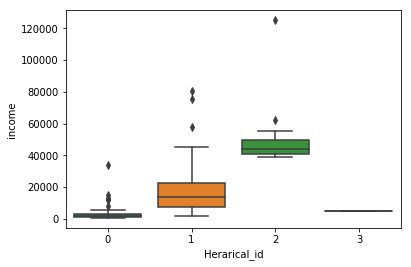

In [364]:
sns.boxplot(x='Herarical_id', y='income', data=dat_2)

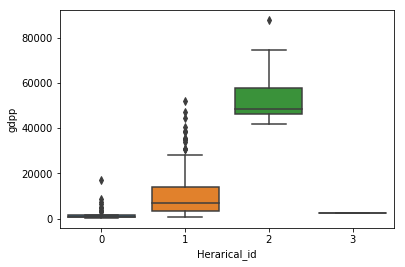

In [365]:
sns.boxplot(x='Herarical_id', y='gdpp', data=dat_2)

### Scatter plots for complete linkage

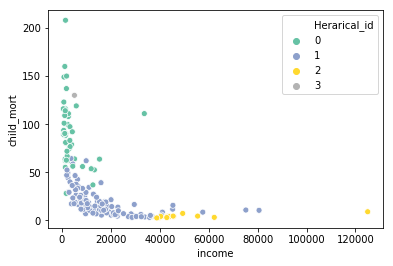

In [366]:
sns.scatterplot(x="income", y="child_mort", hue="Herarical_id",palette="Set2",data=dat_2)

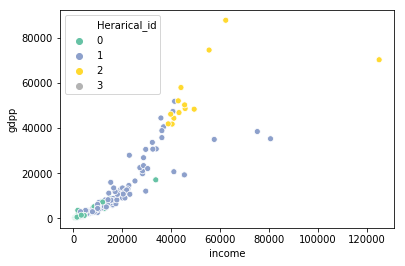

In [367]:
sns.scatterplot(x="income", y="gdpp", hue="Herarical_id",palette="Set2",data=dat_2)

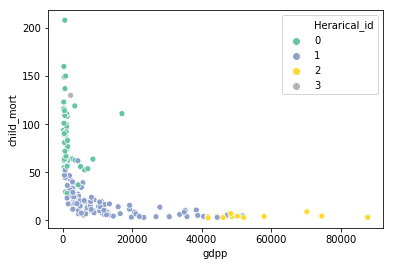

In [368]:
sns.scatterplot(x="gdpp", y="child_mort", hue="Herarical_id",palette="Set2",data=dat_2)

In [369]:
# Creating seperate tables for means of child_mort, income & gdpp


clu_mort = pd.DataFrame(dat_2.groupby(["Herarical_id"]).child_mort.mean())
clu_in= pd.DataFrame(dat_2.groupby(["Herarical_id"]).income.mean())
clu_gdpp = pd.DataFrame(dat_2.groupby(["Herarical_id"]).gdpp.mean())




In [370]:
# Concat the tables
dfx = pd.concat([pd.Series([0,1,2,3]),clu_mort,clu_in,clu_gdpp], axis=1)
dfx

,0,child_mort,income,gdpp
0,0,90.79,3870.70,1900.26
1,1,18.56,17679.71,11638.19
2,2,4.49,51815.38,54723.08
3,3,130.00,5150.00,2330.00


In [371]:
#Adding Column names

dfx.columns=[["Herarical_id","child_mort","income","gdpp"]]


In [372]:
dfx

,Herarical_id,child_mort,income,gdpp
0,0,90.79,3870.70,1900.26
1,1,18.56,17679.71,11638.19
2,2,4.49,51815.38,54723.08
3,3,130.00,5150.00,2330.00


In [373]:
df.shape

(167, 10)

In [374]:
# Filtering based on 'child_mort','income' & 'gdpp'

df_her1=df.loc[df['child_mort']>=91]


In [375]:
df_her2=df_her1.loc[df_her1['income']<=3871]

In [376]:
df_her_fin=df_her2.loc[df_her2['gdpp']<=1901]
#df_kmeans_fin

In [377]:
df_her_fin=df_her_fin.reset_index()

In [378]:
df_her_fin.drop('index',axis=1,inplace=True)

#### Final list that contains desired countries is given below. I could shorten it more by using quantiles values inplace of means but i think all these countries are important because All these need urgent help. ( This list has filtered using Complete linkage hierarical clustering.

In [379]:
df_her_fin

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Benin,111.00,180.40,31.08,281.98,1820,0.89,61.80,5.36,758
1,Burkina Faso,116.00,110.40,38.76,170.20,1430,6.81,57.90,5.87,575
2,Burundi,93.60,20.61,26.80,90.55,764,12.30,57.70,6.26,231
3,Cameroon,108.00,290.82,67.20,353.70,2660,1.91,57.30,5.11,1310
4,Central African Republic,149.00,52.63,17.75,118.19,888,2.01,47.50,5.21,446
5,Chad,150.00,330.10,40.63,390.19,1930,6.39,56.50,6.59,897
6,"Congo, Dem. Rep.",116.00,137.27,26.42,165.66,609,20.80,57.50,6.54,334
7,Cote d'Ivoire,111.00,617.32,64.66,528.26,2690,5.39,56.30,5.27,1220
8,Guinea,109.00,196.34,31.95,279.94,1190,16.10,58.00,5.34,648
9,Guinea-Bissau,114.00,81.50,46.49,192.54,1390,2.97,55.60,5.05,547


#### As you can see that my final country list that i got from 'k-means' and 'complete heirarical clustering' is same. Country list got by 'Single herarical clustering' has contain around 58 values. Also, the clustered taken by 'Single herarical clustering' are also not clear(you can see this in Boxplot for single linkage).

#### Now, out of k-means and 'Complete linkage clustering', cluster obtained in k-means are more clear as compare to 'Complete Linkage' . Its is clearly visble in pairplots and boxplots so for final list of countries i'm taking clusters formed by k-means clustering.

# Final list of Countries(Alphabetically)

In [380]:
df_kmeans_fin

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Benin,111.00,180.40,31.08,281.98,1820,0.89,61.80,5.36,758
1,Burkina Faso,116.00,110.40,38.76,170.20,1430,6.81,57.90,5.87,575
2,Burundi,93.60,20.61,26.80,90.55,764,12.30,57.70,6.26,231
3,Cameroon,108.00,290.82,67.20,353.70,2660,1.91,57.30,5.11,1310
4,Central African Republic,149.00,52.63,17.75,118.19,888,2.01,47.50,5.21,446
5,Chad,150.00,330.10,40.63,390.19,1930,6.39,56.50,6.59,897
6,"Congo, Dem. Rep.",116.00,137.27,26.42,165.66,609,20.80,57.50,6.54,334
7,Cote d'Ivoire,111.00,617.32,64.66,528.26,2690,5.39,56.30,5.27,1220
8,Guinea,109.00,196.34,31.95,279.94,1190,16.10,58.00,5.34,648
9,Guinea-Bissau,114.00,81.50,46.49,192.54,1390,2.97,55.60,5.05,547


In [381]:
df_kmeans_fin['country']

0                        Benin
1                 Burkina Faso
2                      Burundi
3                     Cameroon
4     Central African Republic
5                         Chad
6             Congo, Dem. Rep.
7                Cote d'Ivoire
8                       Guinea
9                Guinea-Bissau
10                       Haiti
11                     Lesotho
12                        Mali
13                  Mauritania
14                  Mozambique
15                       Niger
16                Sierra Leone
Name: country, dtype: object